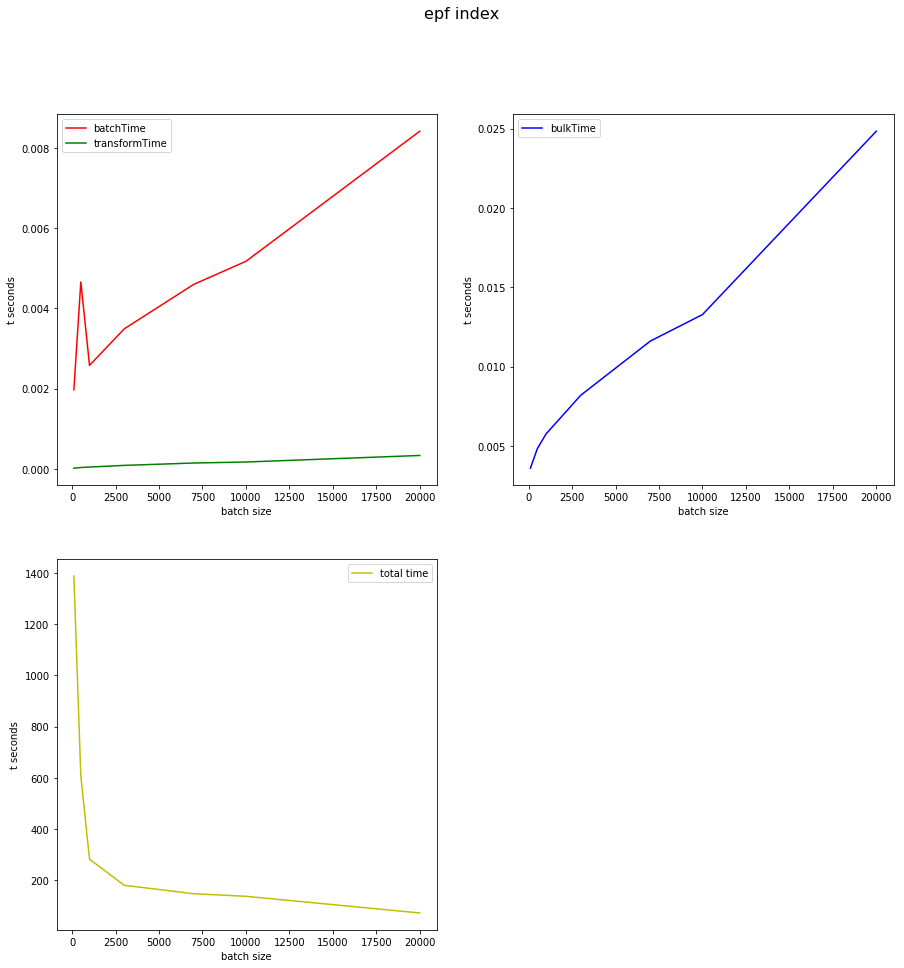

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


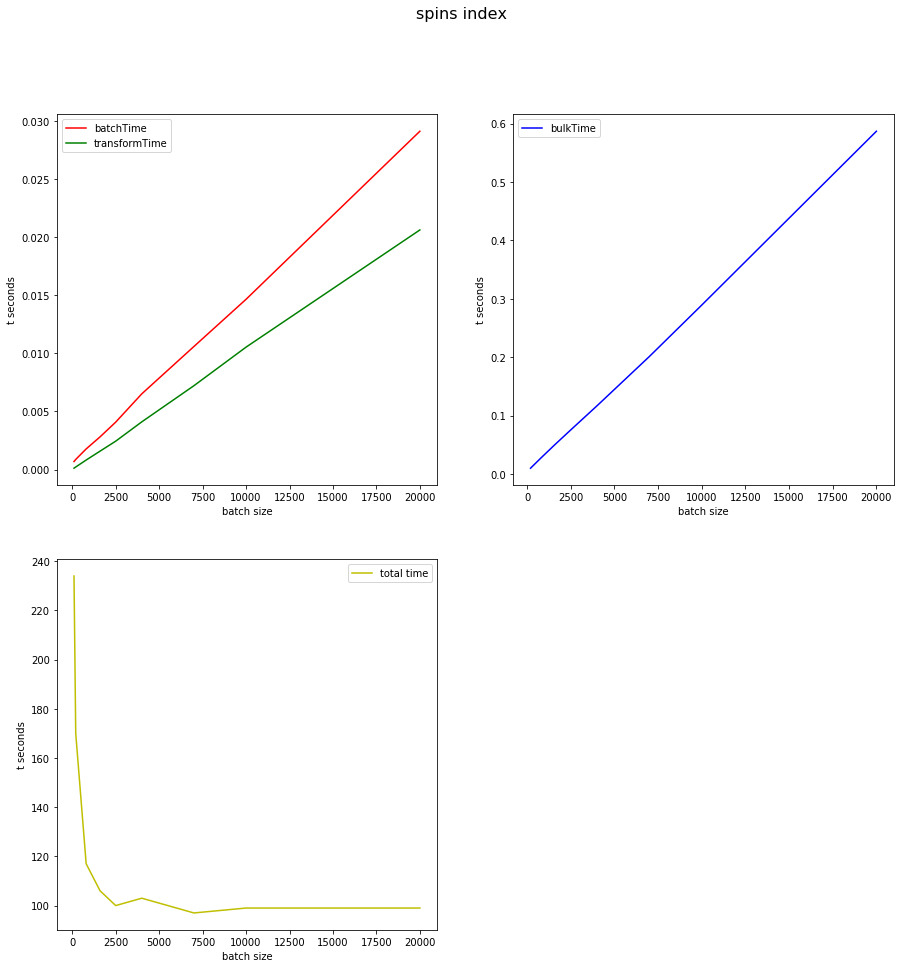

In [29]:
import matplotlib.pyplot as plt
import numpy as np

path = "logs/harvest/"
spins_sizes = [100, 200, 800, 1600, 2500, 4000, 7000, 10000, 20000]
epf_sizes = [100, 500, 1000, 3000, 7000, 10000, 20000]

def plot_index(index, sizes):
    avg_batch = []
    avg_pipeline = []
    avg_bulk = []
    total_times = []
    
    columns = ['time', 'batchTime', 'transformTime', 'bulkTime']
    for size in sizes:
        filename = f'{path}{size}.{index}.log'
        data = np.genfromtxt(filename, delimiter=',', skip_header=1, names=columns)
        avg_batch.append(np.median(data['batchTime']))
        avg_pipeline.append(np.median(data['transformTime']))
        avg_bulk.append(np.median(data['bulkTime']))
        total_times.append(np.max(data['time']) - np.min(data['time']))


    fig = plt.figure(0, figsize=[15, 15]) 
    fig.suptitle(f'{index} index', fontsize=16)

    def subplot(n):
        ax = fig.add_subplot(n)
        ax.set_ylabel('t seconds')
        ax.set_xlabel('batch size')
        return ax

    ax = subplot(221)
    ax.plot(sizes, avg_batch, color='r', label='batchTime')
    ax.plot(sizes, avg_pipeline, color='g', label='transformTime')
    ax.legend()

    ax = subplot(222)
    ax.plot(sizes, avg_bulk, color='b', label='bulkTime')
    ax.legend()

    ax = subplot(223)
    ax.plot(sizes, total_times, color='y', label='total time')
    ax.legend()

    plt.show()


plot_index('epf', epf_sizes)

plot_index('spins', spins_sizes)